**Библиотеки Python для DS (семинары в записи)**

***Урок 7. Практическая работа. Сравнение работы алгоритмов деревьев решений. Использование ансамблевых алгоритмов***

Анализ рынка недвижимости Калифорнии с использованием ансамблевых методов.

Цель задания: Использовать набор данных fetch_california_housing для построения и анализа моделей машинного обучения с акцентом на ансамблевые методы.

1. Загрузка и предварительный анализ данных:
Загрузите данные из предоставленного файла fetch_california_housing.xlsx.
Исследуйте структуру данных, проведите описательный анализ основных статистических показателей.

2. Предобработка данных:
Очистите данные от возможных аномалий и пропущенных значений.

3. Построение моделей:
— Разделите данные на обучающую и тестовую выборки.
— Постройте и обучите модели RandomForestRegressor и GradientBoostingRegressor.
— Постарайтесь оптимизировать их гиперпараметры для улучшения результатов на обучающей выборке.
5. Анализ важности признаков и выводы:
— Используйте атрибут feature_importances_ для оценки важности признаков в каждой модели.
— На основе полученных данных сделайте выводы о том, какие признаки наиболее значимы и почему.

6. Дополнительные задачи (для желающих углубить знания):
— Проведите кросс-валидацию результатов.
— Исследуйте влияние удаления некоторых признаков на производительность моделей.

4. Оценка моделей:
— Оцените качество моделей на тестовой выборке с использованием метрик RMSE (Root Mean Squared Error) и R² (коэффициент детерминации).
— Сравните результаты моделей, интерпретируйте их.

Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

Прочитаем датасет и посмотрим на базовые признаки

In [2]:
df_dep = pd.read_excel('sample_data/fetch_california_housing.xlsx')
df_dep.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
20635,1.5603,25,5.045455,1.133333,845,2.560606,39.48,-121.09,0.781
20636,2.5568,18,6.114035,1.315789,356,3.122807,39.49,-121.21,0.771
20637,1.7000,17,5.205543,1.120092,1007,2.325635,39.43,-121.22,0.923
20638,1.8672,18,5.329513,1.171920,741,2.123209,39.43,-121.32,0.847
20639,2.3886,16,5.254717,1.162264,1387,2.616981,39.37,-121.24,0.894


**Датасет California Housing содержит информацию о ценах на жилье в Калифорнии и включает несколько характеристик, которые могут быть использованы для предсказания медианной стоимости домов.**

**Описание столбцов датасета California Housing**:

- MedInc:	медианный доход в блоке (median income in block group)
- HouseAge:	медианный возраст домов в блоке (median house age in block group)
- AveRooms:	среднее количество комнат на домохозяйство (average number of rooms per household)
- AveBedrms: среднее количество спален на домохозяйство (average number of bedrooms per household)
- Population:	население блока (block group population)
- AveOccup:	среднее количество членов домохозяйства (average number of household members)
- Latitude: широта блока в десятичных градусах (latitude of the block in decimal degrees)
- Longitude: долгота блока в десятичных градусах (longitude of the block in decimal degrees)
- target:	медианная стоимость домов в блоке, выраженная в сотнях тысяч долларов (median house value for California districts, expressed in hundreds of thousands of dollars)

In [3]:
df_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  int64  
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  int64  
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.4 MB


In [4]:
print("Размер датасета:", df_dep.shape)
print("Пропущенные значения:")
print(df_dep.isnull().sum())

Размер датасета: (20640, 9)
Пропущенные значения:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


In [5]:
df_dep.duplicated().sum()

0

In [6]:
df_dep.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
target,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


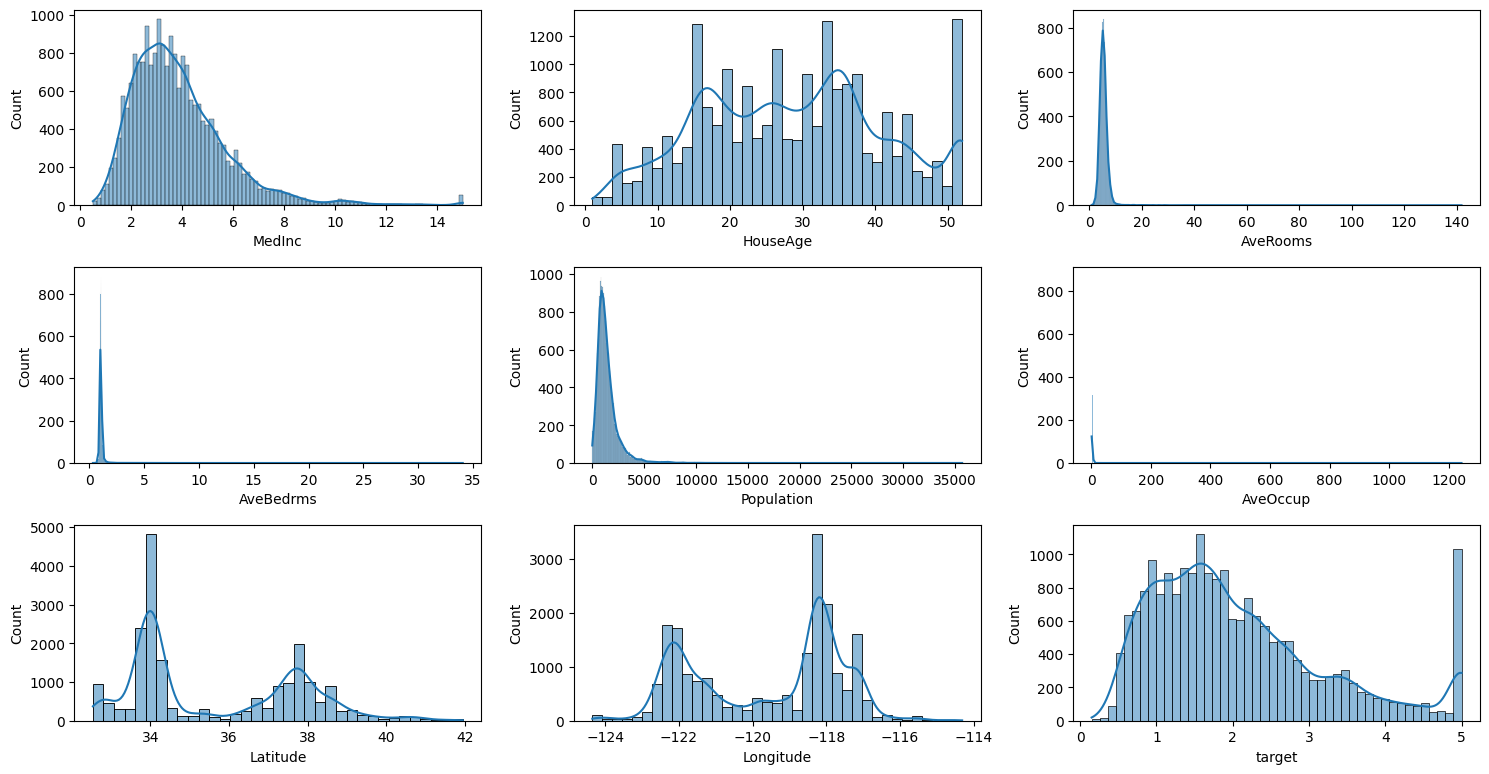

In [7]:
# Визуализация гистограмм
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_dep.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df_dep[column], kde=True)

plt.tight_layout()
plt.show()

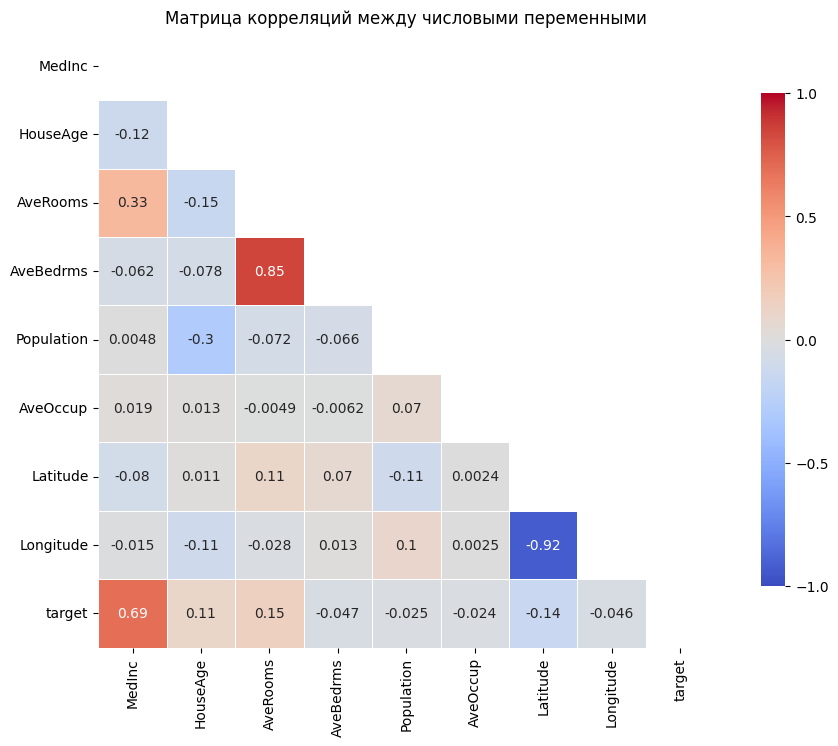

In [8]:
correlation_matrix = df_dep.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot_kws={"size": 10},
            cbar_kws={"shrink": 0.8, "orientation": "vertical", "ticks": [-1, -0.5, 0, 0.5, 1]})
plt.title('Матрица корреляций между числовыми переменными')
plt.show()

Подготовка данных к обучению

In [9]:
X = df_dep.drop(columns=['target'])
y = df_dep['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размер X_train: {len(X_train)}")
print(f"Размер X_test: {len(X_test)}")
print(f"Размер y_train: {len(y_train)}")
print(f"Размер y_test: {len(y_test)}")

Размер X_train: 16512
Размер X_test: 4128
Размер y_train: 16512
Размер y_test: 4128


Создание и обучение модели RandomForestRegressor и GradientBoostingRegressor.
Оптимизация их гиперпараметров для улучшения результатов на обучающей выборке.

Будем использовать GridSearchCV для подбора гиперпараметров

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# Определение модели RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Определение параметров для поиска
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [0.1, 1.0]
}

# Настройка GridSearchCV для RandomForestRegressor
rf_grid_search = GridSearchCV(estimator=rf_model,
                               param_grid=rf_param_grid,
                               scoring='neg_mean_squared_error',
                               cv=5,
                               verbose=1)

# Обучение модели
rf_grid_search.fit(X_train, y_train)

# Лучшая модель и параметры
best_rf_model = rf_grid_search.best_estimator_
print(f'Best parameters for Random Forest: {rf_grid_search.best_params_}')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters for Random Forest: {'max_depth': None, 'max_features': 1.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [13]:
# Определение модели GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)

# Определение параметров для поиска
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [0.1, 1.0]
}

# Настройка GridSearchCV для GradientBoostingRegressor
gb_grid_search = GridSearchCV(estimator=gb_model,
                               param_grid=gb_param_grid,
                               scoring='neg_mean_squared_error',
                               cv=5,
                               verbose=1)

# Обучение модели
gb_grid_search.fit(X_train, y_train)

# Лучшая модель и параметры
best_gb_model = gb_grid_search.best_estimator_
print(f'Best parameters for Gradient Boosting: {gb_grid_search.best_params_}')

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 1.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [14]:
# Оценка RandomForestRegressor на тестовых данных
rf_predictions = best_rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f'Random Forest MSE: {rf_mse:.4f}, R^2: {rf_r2:.4f}')

# Оценка GradientBoostingRegressor на тестовых данных
gb_predictions = best_gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print(f'Gradient Boosting MSE: {gb_mse:.4f}, R^2: {gb_r2:.4f}')

Random Forest MSE: 0.2540, R^2: 0.8061
Gradient Boosting MSE: 0.2223, R^2: 0.8303


**Оценка моделей. Интерпретация.**

**Результаты**

1. Random Forest
- MSE (Mean Squared Error): 0.2540
- R² (Coefficient of Determination): 0.8061
2. Gradient Boosting
- MSE: 0.2223
- R²: 0.8303

**Анализ результатов**

1. Сравнение по критерию MSE:
- Меньшее значение MSE у модели Gradient Boosting (0.2223) по сравнению с Random Forest (0.2540) указывает на то, что Gradient Boosting в среднем делает менее значительные ошибки в предсказаниях.
- Это говорит о том, что Gradient Boosting лучше справляется с задачей предсказания медианной стоимости жилья в Калифорнии.
2. Сравнение по критерию R²:
- Значение R² для Gradient Boosting (0.8303) выше, чем для Random Forest (0.8061). Это означает, что Gradient Boosting объясняет больше вариации в целевой переменной по сравнению с Random Forest.
- R² близкое к 1 указывает на то, что модель хорошо подходит к данным, и в данном случае обе модели показывают хорошую способность объяснять вариацию целевой переменной, но Gradient Boosting делает это лучше.

**Вывод**
1. Эффективность моделей: оба метода показывают хорошую производительность, но Gradient Boosting является более эффективным в данной задаче, так как он имеет меньшую среднеквадратичную ошибку и более высокое значение R².
2. Выбор модели: если цель состоит в том, чтобы минимизировать ошибки предсказания и повысить точность модели, то Gradient Boosting будет предпочтительным выбором.
3. Потенциал улучшения: несмотря на хорошие результаты, всегда есть возможность улучшения моделей путем дальнейшей настройки гиперпараметров или использования других методов ансамблевого обучения (например, XGBoost или LightGBM), которые могут обеспечить еще лучшие результаты.

Использование атрибута feature_importances_ для оценки важности признаков в каждой из представленных моделией (RandomForestRegressor и GradientBoostingRegressor). Выводы.

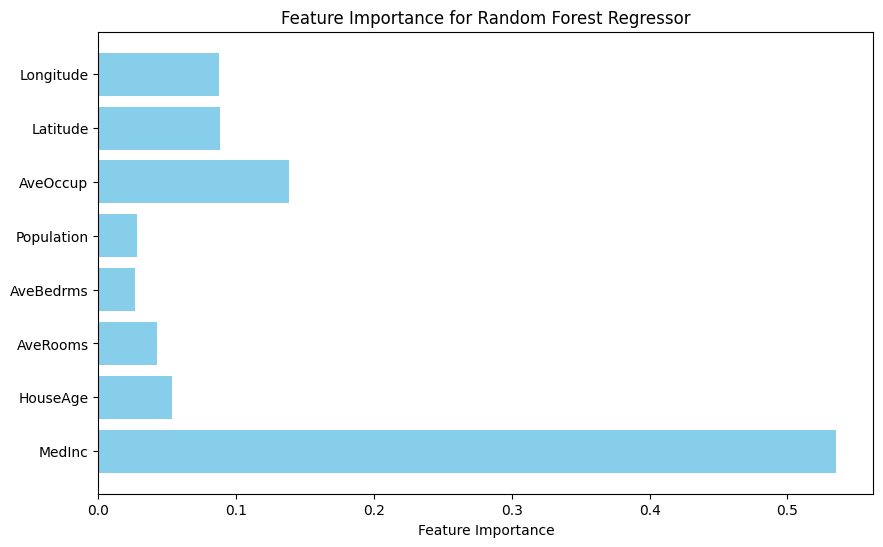

In [15]:
# Важность признаков для RandomForestRegressor
rf_importances = best_rf_model.feature_importances_
rf_feature_names = X.columns

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_names, rf_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest Regressor')
plt.show()

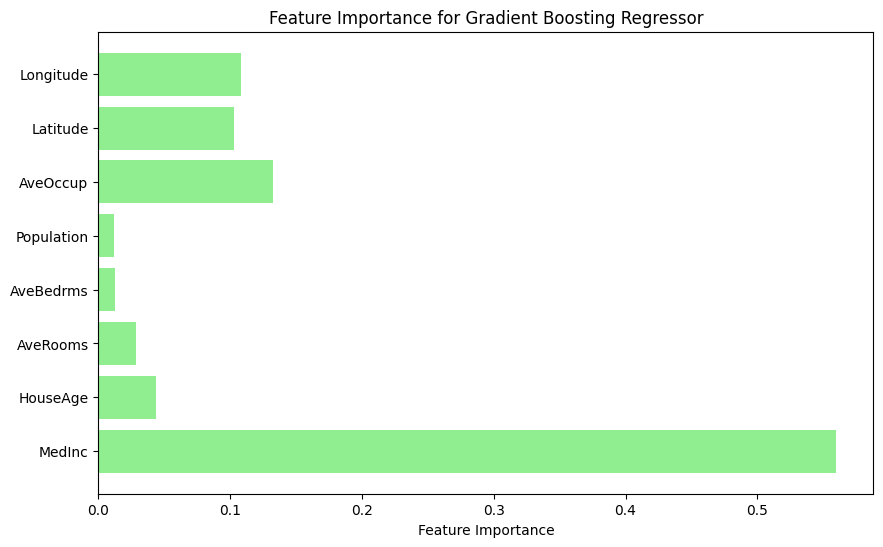

In [16]:
# Важность признаков для GradientBoostingRegressor
gb_importances = best_gb_model.feature_importances_

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_names, gb_importances, color='lightgreen')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Gradient Boosting Regressor')
plt.show()

**Сравнение важности признаков:**
1. для модели RandomForestRegressor оказалось, что медианный доход (MedInc) имеет наивысшую важность, за ним следуют такие признаки, как среднее количество домохозяйств (AveOccup) и месторасположение (Longitude & Latitude).
2. В GradientBoostingRegressor мы имеем схожую картину: медианный доход (MedInc) имеет наивысшую важность, за ним следуют признаки AveOccup, Longitude, Latitude.

**Выводы о значимости признаков:**
1. Медианный доход (MedInc): обычно является одним из самых важных факторов для оценки стоимости жилья. Более высокий доход в районе может указывать на более высокие цены на жилье.
2. Среднее количество домохозяйств (AveOccup): также влияет на стоимость жилья, что скорее всего связано с тем, что количество домохозяйств отражает спрос на жилье в данной местности.
3. Месторасположение (Longitude & Latitude): очевидно, что месторасположение дома оказывает существенное влияние на его ценообразование и варьируется в зависимости от конкретного района, близости к общественному транспорту, наличием определенной инфраструктуры и проч.

**Заключение**
Анализ важности признаков позволяет понять, какие факторы наиболее влияют на предсказания рассматриваемой модели. Важно помнить, что результаты могут различаться в зависимости от модели и данных, поэтому полезно рассматривать результаты в контексте конкретной задачи и области применения.

Кросс-валидация результатов. Исследование влияния удаления некоторых признаков на производительность моделей.

In [17]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация для RandomForestRegressor
rf_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
rf_mse = -rf_scores.mean()
print(f'Random Forest Cross-Validated MSE: {rf_mse:.4f}')

# Кросс-валидация для GradientBoostingRegressor
gb_scores = cross_val_score(best_gb_model, X, y, cv=5, scoring='neg_mean_squared_error')
gb_mse = -gb_scores.mean()
print(f'Gradient Boosting Cross-Validated MSE: {gb_mse:.4f}')

Random Forest Cross-Validated MSE: 0.4233
Gradient Boosting Cross-Validated MSE: 0.3988


In [18]:
# Удаление некоторых признаков
X_reduced = X.drop(columns=['AveOccup', 'HouseAge'])

# Кросс-валидация для RandomForestRegressor с уменьшенным набором признаков
rf_reduced_scores = cross_val_score(best_rf_model, X_reduced, y, cv=5, scoring='neg_mean_squared_error')
rf_reduced_mse = -rf_reduced_scores.mean()
print(f'Random Forest Cross-Validated MSE (Reduced Features): {rf_reduced_mse:.4f}')

# Кросс-валидация для GradientBoostingRegressor с уменьшенным набором признаков
gb_reduced_scores = cross_val_score(best_gb_model, X_reduced, y, cv=5, scoring='neg_mean_squared_error')
gb_reduced_mse = -gb_reduced_scores.mean()
print(f'Gradient Boosting Cross-Validated MSE (Reduced Features): {gb_reduced_mse:.4f}')

Random Forest Cross-Validated MSE (Reduced Features): 0.5432
Gradient Boosting Cross-Validated MSE (Reduced Features): 0.5359


***Результаты кросс-валидации***

***До удаления признаков:***

- Random Forest Cross-Validated MSE: 0.4233
- Gradient Boosting Cross-Validated MSE: 0.3988

***После удаления признаков:***

- Random Forest Cross-Validated MSE (Reduced Features): 0.5432
- Gradient Boosting Cross-Validated MSE (Reduced Features): 0.5359

***Анализ результатов***
1.	Увеличение MSE после удаления признаков:
- Для обеих моделей наблюдается увеличение значения среднеквадратичной ошибки (MSE) после удаления признаков.
- Для Random Forest MSE увеличилось с 0.4233 до 0.5432, а для Gradient Boosting — с 0.3988 до 0.5359.
2.	Выводы о важности удаленных признаков:
- Увеличение MSE указывает на то, что удаленные признаки были значимыми для предсказания целевой переменной (стоимости жилья). Это означает, что эти признаки содержали информацию, которая помогала моделям делать более точные предсказания.
- Так как среди удаленных признаков был признак, который являлся вторым по значимости (AveOccup) очевидно, что это повлияло на результаты, что еще раз подтвердило, что признак AveOccup вносил важный вклад в понимание модели.
3.	Сравнение моделей:
- Gradient Boosting изначально показал меньшую MSE по сравнению с Random Forest, что указывает на его лучшую производительность на полном наборе признаков.
- После удаления признаков обе модели показали ухудшение производительности, но Gradient Boosting все еще остается более эффективным вариантом по сравнению с Random Forest.
4. Заключение
- Удаление признаков привело к ухудшению качества моделей, что подтверждает их значимость.
- Это подчеркивает важность тщательного выбора признаков при построении моделей машинного обучения.
- При работе с данными важно сохранять признаки, которые могут быть полезны для модели, поэтому рекомендуется проводить анализ важности признаков (например, с использованием атрибута feature_importances_) перед их удалением.

